# Importing libraries

In [24]:
# Import the pandas library and alias it as 'pd'
import pandas as pd

# Import the numpy library and alias it as 'np'
import numpy as np

# Import the matplotlib.pyplot module and alias it as 'plt'
import matplotlib.pyplot as plt

# Reading the dataset

In [25]:
# Read the data from the "data_science_job.csv" file and store it in the DataFrame 'df'
df = pd.read_csv("data_science_job.csv")

# Display a random sample of 5 rows from the DataFrame 'df'
df.sample(5)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
17686,11312,city_160,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,9.0,50-99,Pvt Ltd,105.0,0.0
16086,4493,city_28,0.939,Male,Has relevent experience,no_enrollment,Graduate,STEM,7.0,1000-4999,Pvt Ltd,29.0,0.0
7334,32293,city_16,0.910,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,NaN,NaN,14.0,1.0
14481,30764,city_16,0.910,Other,No relevent experience,NaN,High School,NaN,1.0,NaN,NaN,34.0,1.0
13584,21684,city_138,0.836,Female,Has relevent experience,no_enrollment,Graduate,STEM,9.0,50-99,Pvt Ltd,6.0,0.0


# Handling missing values

In [26]:
# This code computes the mean of null values in each column and multiplies it by 100 to get the percentage.
df.isnull().mean() * 100

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

In [27]:
# Create a list 'cols' containing column names where the null (missing) value percentage is less than 5% (0.05) and greater
# than 0% 
cols = [var for var in df.columns if df[var].isnull().mean() < 0.05 and df[var].isnull().mean() > 0]

# Display the 'cols' list, which contains the selected column names.
cols

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [28]:
# Create a random sample of 5 rows from the DataFrame 'df' using only the columns specified in the 'cols' list.
df[cols].sample(5)

,city_development_index,enrolled_university,education_level,experience,training_hours
11044,0.754,NaN,High School,4.0,10.0
17050,0.920,no_enrollment,Graduate,20.0,90.0
11811,0.926,Part time course,Graduate,1.0,33.0
11621,0.920,Full time course,Phd,13.0,28.0
18046,0.939,no_enrollment,Graduate,4.0,NaN


In [29]:
# Calculate the proportion of non-null values in the specified columns ('cols') of the DataFrame 'df' by dividing the 
# length of the DataFrame with non-null values by the total length of 'df'.
len(df[cols].dropna()) / len(df)

0.8968577095730244

<h3>Dropping missing values (CCA)</h3>

In [30]:
# Create a new DataFrame 'new_df' by selecting only the specified columns ('cols') from the original DataFrame ('df')
# and dropping rows with missing values.
new_df = df[cols].dropna()

# Display the shapes of both the original DataFrame 'df' and the new DataFrame 'new_df'.
df.shape, new_df.shape

((19158, 13), (17182, 5))

# Graphical representation of original dataset vs CCA data

<h4>Graphical representation of the 'training hour' column in the original dataset 'df' and the new CCA dataset 'df_new'</h4>

<AxesSubplot:>

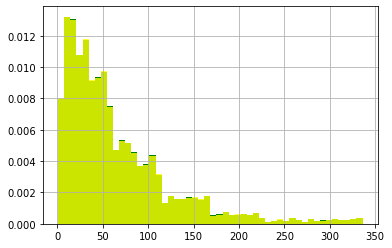

In [31]:
# Create a new figure and axis for plotting.
fig = plt.figure()
ax = fig.add_subplot(111)

# Plot the histogram of the 'training_hours' column from the original data (df).
# Using 'bins=50' to set the number of bins, 'density=True' for density normalization, and 'color' for the color of the plot.
df['training_hours'].hist(bins=50, density=True, color='green', ax=ax)

# Plot the histogram of the 'training_hours' column from the data (new_df) after transformation (dropping missing values)
# Using 'bins=50' to set the number of bins, 'density=True' for density normalization, 'color' for the color of the plot, 
# and 'alpha=0.8' to make the color slightly transparent for better visualization.
new_df['training_hours'].hist(bins=50, density=True, color='yellow', ax=ax, alpha=0.8)

As we can see, there is no significant difference in the histogram of the training hour column between the original dataset 'df' and the new dataset 'df_new.' If this is the case, we can drop the missing values.

<AxesSubplot:ylabel='Density'>

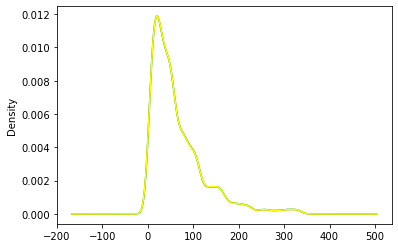

In [41]:
# Create a new figure and axis for plotting.
fig = plt.figure()
ax = fig.add_subplot(111)

# Plot the density plot of the 'training_hours' column from the original data (df).
# Using 'color' to specify the color of the plot.
df['training_hours'].plot.density(color='green')

# Plot the density plot of the 'training_hours' column from the data (new_df) after transformation (dropping missing values)
# Using 'color' to specify the color of the plot.
new_df['training_hours'].plot.density(color='yellow')

As we can see, there is no significant difference in the density plot of the training hour column between the original dataset 'df' and the new dataset 'df_new.' If this is the case, we can drop the missing values.

<h4>Graphical representation of the 'city_development_index' column in the original dataset 'df' and the new CCA dataset 'df_new'</h4>

<AxesSubplot:>

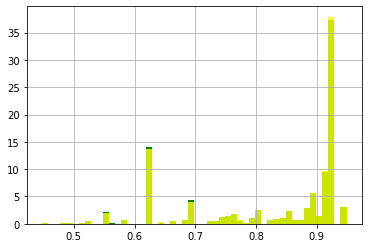

In [33]:
# Create a new figure and axis for plotting.
fig = plt.figure()
ax = fig.add_subplot(111)

# Plot the histogram of the 'city_development_index' column from the original data (df).
# Using 'bins=50' to set the number of bins, 'density=True' for density normalization, and 'color' for the color of the plot.
df['city_development_index'].hist(bins=50, density=True, color='green', ax=ax)

# Plot the histogram of the 'city_development_index' column from the data (new_df) after transformation (dropping missing values)
# Using 'bins=50' to set the number of bins, 'density=True' for density normalization, 'color' for the color of the plot, 
# and 'alpha=0.8' to make the color slightly transparent for better visualization.
new_df['city_development_index'].hist(bins=50, density=True, color='yellow', ax=ax, alpha=0.8)

As we can see, there is no significant difference in the histogram of thecity_development_index column between the original dataset 'df' and the new dataset 'df_new.' If this is the case, we can drop the missing values.

<AxesSubplot:ylabel='Density'>

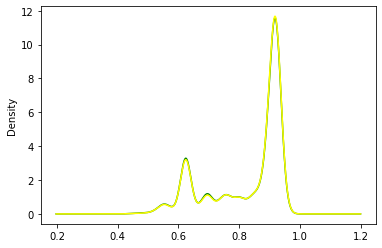

In [40]:
# Create a new figure and axis for plotting.
fig = plt.figure()
ax = fig.add_subplot(111)

# Plot the density plot of the 'city_development_index' column from the original data (df).
# Using 'color' to specify the color of the plot.
df['city_development_index'].plot.density(color='green')

# Plot the density plot of the 'city_development_index' column from the data (new_df) after transformation (dropping missing values)
# Using 'color' to specify the color of the plot.
new_df['city_development_index'].plot.density(color='yellow')

As we can see, there is no significant difference in the density plot of the city_development_index column between the original dataset 'df' and the new dataset 'df_new.' If this is the case, we can drop the missing values

<h4>Graphical representation of the 'experience' column in the original dataset 'df' and the new CCA dataset 'df_new'</h4>

<AxesSubplot:>

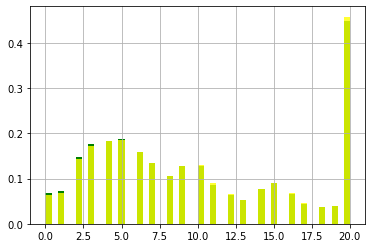

In [35]:
# Create a new figure and axis for plotting.
fig = plt.figure()
ax = fig.add_subplot(111)

# Plot the histogram of the 'experience' column from the original data (df).
# Using 'bins=50' to set the number of bins, 'density=True' for density normalization, and 'color' for the color of the plot.
df['experience'].hist(bins=50, density=True, color='green', ax=ax)

# Plot the histogram of the 'experience' column from the data (new_df) after some transformation (dropping missing values).
# Using 'bins=50' to set the number of bins, 'density=True' for density normalization, 'color' for the color of the plot,
# and 'alpha=0.8' to make the color slightly transparent for better visualization.
new_df['experience'].hist(bins=50, density=True, color='yellow', ax=ax, alpha=0.8)

As we can see, there is a slight difference in the histogram of the 'experience' column between the original dataset 'df' and the new dataset 'df_new.' If this is the case, we have to be careful before dropping missing values.

<AxesSubplot:ylabel='Density'>

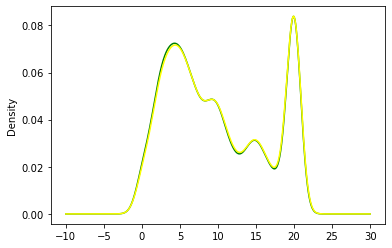

In [39]:
# Create a new figure and axis for plotting.
fig = plt.figure()
ax = fig.add_subplot(111)

# Plot the density plot of the 'experience' column from the original data (df).
# Using 'color' to specify the color of the plot.
df['experience'].plot.density(color='green')

# Plot the density plot of the 'experience' column from the data(new_df) after transformation (droping missing value).
# Using 'color' to specify the color of the plot.
new_df['experience'].plot.density(color='yellow')

As we can see, there is a slight difference in the density plot of the 'experience' column between the original dataset 'df' and the new dataset 'df_new.' If this is the case, we have to be careful before dropping missing values

## The percentage per category of the columns before and after dropping missing values

#### The percentage per category of the column 'enrolled_university' before and after dropping missing values

In [44]:
temp = pd.concat([
    # Calculate the percentage of observations per category for the 'enrolled_university' column in the original data.
    df['enrolled_university'].value_counts() / len(df),
    
    # Calculate the percentage of observations per category for the 'enrolled_university' column in the transformed data (new_df).
    new_df['enrolled_university'].value_counts() / len(new_df)
    ], 
    axis=1)

# Add column names to the DataFrame 'temp' for clarity.
temp.columns = ['original', 'cca']
temp

,original,cca
no_enrollment,0.721213,0.735188
Full time course,0.196106,0.200733
Part time course,0.062533,0.064079


As we can observe that percentage per category for the 'enrolled_university' column is almost equal, which shows that dropping missing value doesn't create any negative effect.

#### The percentage per category of the column 'education_level' before and after dropping missing values.

In [45]:
temp = pd.concat([
    # Calculate the percentage of observations per category for the 'education_level' column in the original data.
    df['education_level'].value_counts() / len(df),
    
    # Calculate the percentage of observations per category for the 'education_level' column in the transformed data (new_df).
    new_df['education_level'].value_counts() / len(new_df)
    ], 
    axis=1)

# Add column names to the DataFrame 'temp' for clarity.
temp.columns = ['original', 'cca']
temp

,original,cca
Graduate,0.605387,0.619835
Masters,0.227633,0.234082
High School,0.105282,0.107380
Phd,0.021610,0.022116
Primary School,0.016077,0.016587


We can observe that the percentage per category for the 'education_level' column is nearly equal, indicating that dropping missing values does not have a negative effect.